# Sklearn Tutorial

Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. Today we will go over few important use cases of sklearn

Before we dive in, let’s firstly get aligned on two terms:
- **Transformer**: A transformer refers to an object with fit() and transform() method that cleans, reduces, expands or generates features. Simply put, transformers help you transform your data towards a desired format for a machine learning model. OneHotEncoder and MinMaxScaler are examples of transformers.
- **Estimator**: An estimator refers to a machine learning model. It is an object with fit() and predict() method. We will use estimator and model interchangeably throughout this post. Here are some example estimators.

In [1]:
import numpy as np
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt

# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split

# Load dataset
df = load_dataset('tips')

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Train test split:

In [4]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['total_bill']), 
                                                    df['total_bill'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

# Transformer (Preprocessing)

A transformer refers to an object with **fit()** and **transform()** method that cleans, reduces, expands or generates features. Simply put, transformers help you transform your data towards a desired format for a machine learning model. OneHotEncoder and MinMaxScaler are examples of transformers.

### MinMaxScaler

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Transform features by scaling each feature to a given range.


#### Example:

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Example data:
data = np.array([[-1, 2], [-0.8, 6], [0, 10], [1, 18]])
print(data)


[[-1.   2. ]
 [-0.8  6. ]
 [ 0.  10. ]
 [ 1.  18. ]]


In [9]:
# Scale example data to 0-1:
scaler = MinMaxScaler((0, 1))
scaler.fit(data)

MinMaxScaler()

In [10]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.1  0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


#### Apply MinMaxScaler to `tip` and `size` fields:

In [11]:
scaler = MinMaxScaler()
tip_size_trans = scaler.fit_transform(X_train[['tip', 'size']])
tip_size_trans

array([[0.19111111, 0.2       ],
       [0.11444444, 0.2       ],
       [0.33333333, 0.2       ],
       [0.38888889, 0.6       ],
       [0.11444444, 0.2       ],
       [0.27888889, 0.2       ],
       [0.11111111, 0.2       ],
       [0.46111111, 0.2       ],
       [0.08333333, 0.2       ],
       [0.19333333, 0.4       ],
       [0.22222222, 0.4       ],
       [0.46      , 0.8       ],
       [0.27777778, 0.2       ],
       [0.51666667, 0.2       ],
       [0.16666667, 0.2       ],
       [0.11222222, 0.2       ],
       [0.34222222, 0.2       ],
       [0.12111111, 0.2       ],
       [0.        , 0.        ],
       [0.26777778, 0.4       ],
       [0.27555556, 0.4       ],
       [0.11111111, 0.6       ],
       [0.22222222, 0.8       ],
       [0.19      , 0.2       ],
       [0.22222222, 0.2       ],
       [0.22222222, 0.2       ],
       [0.22222222, 0.6       ],
       [0.29777778, 0.6       ],
       [0.41222222, 0.6       ],
       [0.22222222, 0.6       ],
       [0.

In [12]:
tip_size_trans.shape

(195, 2)

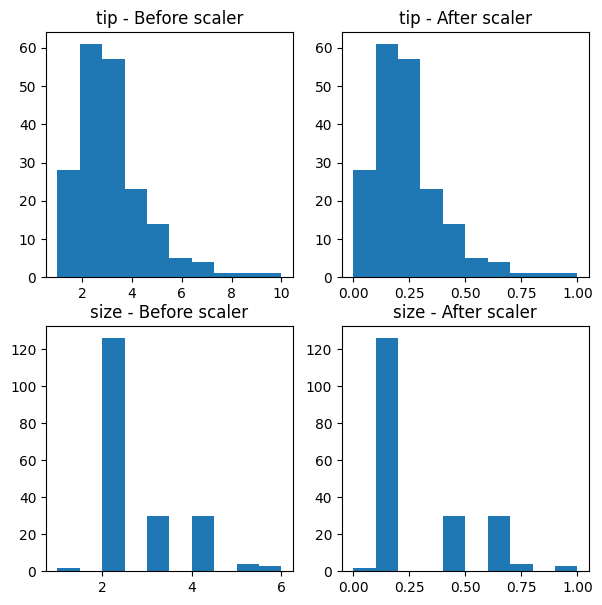

In [13]:
plt.figure(figsize = (7,7))
plt.subplot(221)
plt.hist(X_train['tip'])
plt.title('tip - Before scaler')

plt.subplot(222)
plt.hist(tip_size_trans[:, 0])
plt.title('tip - After scaler')

plt.subplot(223)
plt.hist(X_train['size'])
plt.title('size - Before scaler')

plt.subplot(224)
plt.hist(tip_size_trans[:, 1])
plt.title('size - After scaler')


plt.show()

👉 Extra: There is another popular scaler is `StandardScaler`. For more information you can visit: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

## One hot encoder

*Encode* categorical features as a one-hot numeric array.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [14]:
X_train.head()

,tip,sex,smoker,day,time,size
228,2.72,Male,No,Sat,Dinner,2
208,2.03,Male,Yes,Sat,Dinner,2
96,4.00,Male,Yes,Fri,Dinner,2
167,4.50,Male,No,Sun,Dinner,4
84,2.03,Male,No,Thur,Lunch,2


In [15]:
X_train.day.value_counts()

Sat     70
Sun     61
Thur    47
Fri     17
Name: day, dtype: int64

In [16]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [17]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
day_trans = onehot_encoder.fit_transform(X_train[['day']])
day_trans

c:\Users\Lenovo\anaconda3\envs\DA\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],


In [18]:
# get column name:
onehot_encoder.get_feature_names_out(['day'])

array(['day_Fri', 'day_Sat', 'day_Sun', 'day_Thur'], dtype=object)

In [19]:
print("******************** Show transforming steps ********************")
display(X_train[['day']].sample(5, random_state = 96))
display(pd.DataFrame(day_trans, columns = onehot_encoder.get_feature_names_out(['day'])).sample(5, random_state = 96))

******************** Show transforming steps ********************


,day
229,Sat
77,Thur
121,Thur
68,Sat
130,Thur


,day_Fri,day_Sat,day_Sun,day_Thur
171,0.0,1.0,0.0,0.0
63,0.0,0.0,0.0,1.0
185,0.0,0.0,0.0,1.0
15,0.0,1.0,0.0,0.0
175,0.0,0.0,0.0,1.0


## Ordinal Encoder

Encode categorical features as an integer array. Very useful to deal with ordinal categorical feature. Also it can be a trick to transform binary categorical features (where OneHotEncoder will result in extra columns)

However, be careful when applying this encoding strategy: **using this integer representation leads predictive models to assume that the values are ordered (0 < 1 < 2 < 3... for example)**

In [20]:
X_train.head()

,tip,sex,smoker,day,time,size
228,2.72,Male,No,Sat,Dinner,2
208,2.03,Male,Yes,Sat,Dinner,2
96,4.00,Male,Yes,Fri,Dinner,2
167,4.50,Male,No,Sun,Dinner,4
84,2.03,Male,No,Thur,Lunch,2


In [21]:
from sklearn.preprocessing import OrdinalEncoder


👉 Transform for a single column:

In [22]:
X_train[['smoker']].tail()

,smoker
106,Yes
14,No
92,Yes
179,Yes
102,Yes


In [23]:
ord_encoder = OrdinalEncoder(categories=[['No', 'Yes']])
smoker_trans = ord_encoder.fit_transform(X_train[['smoker']])
smoker_trans[-5:] # Get the last  values

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

👉 Transform for multiple columns:

In [24]:
X_train[['sex', 'smoker', 'time']].tail()

,sex,smoker,time
106,Male,Yes,Dinner
14,Female,No,Dinner
92,Female,Yes,Dinner
179,Male,Yes,Dinner
102,Female,Yes,Dinner


In [25]:
ord_encoder = OrdinalEncoder(categories=[['Female', 'Male'], ['No', 'Yes'], ['Dinner', 'Lunch']])
sex_smoker_time_trans = ord_encoder.fit_transform(X_train[['sex', 'smoker', 'time']])

sex_smoker_time_trans[-5:]

array([[1., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [0., 1., 0.]])

## Combine all transformed data

In [26]:
X_train.head()

,tip,sex,smoker,day,time,size
228,2.72,Male,No,Sat,Dinner,2
208,2.03,Male,Yes,Sat,Dinner,2
96,4.00,Male,Yes,Fri,Dinner,2
167,4.50,Male,No,Sun,Dinner,4
84,2.03,Male,No,Thur,Lunch,2


In [27]:
X_train_trans = np.concatenate((tip_size_trans, sex_smoker_time_trans, day_trans), axis = 1)
X_train_trans.shape

(195, 9)

In [28]:
X_train_trans[:5]

array([[0.19111111, 0.2       , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.11444444, 0.2       , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.33333333, 0.2       , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.38888889, 0.6       , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.11444444, 0.2       , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ]])

## Transforming test data

It's best practice to perform data preprocessing's preparation on your train data, and apply those transformation on test data (to simulate real life scenario where we are not going to access future data beforehand)

In [29]:
X_test.head()

,tip,sex,smoker,day,time,size
24,3.18,Male,No,Sat,Dinner,2
6,2.00,Male,No,Sun,Dinner,2
153,2.00,Male,No,Sun,Dinner,4
211,5.16,Male,Yes,Sat,Dinner,4
198,2.00,Female,Yes,Thur,Lunch,2


In [30]:
# Transform Train data. 
# Note that just use transform function not use fit_transform since those transformer had learnt from train data
train_tip_size_trans         = scaler.fit_transform(X_train[['tip', 'size']])
train_day_trans              = onehot_encoder.fit_transform(X_train[['day']])
train_sex_smoker_time_trans  = ord_encoder.fit_transform(X_train[['sex', 'smoker', 'time']])

# Combine all:
X_test_trans = np.concatenate((train_tip_size_trans, train_sex_smoker_time_trans, train_day_trans), axis = 1)

c:\Users\Lenovo\anaconda3\envs\DA\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
# Transform test data. 
# Note that just use transform function not use fit_transform since those transformer had learnt from train data
test_tip_size_trans         = scaler.transform(X_test[['tip', 'size']])
test_day_trans              = onehot_encoder.transform(X_test[['day']])
test_sex_smoker_time_trans  = ord_encoder.transform(X_test[['sex', 'smoker', 'time']])

# Combine all:
X_test_trans = np.concatenate((test_tip_size_trans, test_sex_smoker_time_trans, test_day_trans), axis = 1)


In [32]:
X_test_trans[:5]

array([[0.24222222, 0.2       , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.11111111, 0.2       , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.11111111, 0.6       , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.46222222, 0.6       , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.11111111, 0.2       , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ]])

# Estimator (Machine Learning Model)

An estimator refers to a machine learning model. It is an object with **fit()** (training part) and **predict()** method. We will use estimator and model interchangeably throughout this post. Here is an example of Linear Regression, an sklearn estimator

Documentation for LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
# Fit model to training data
model = LinearRegression()
model.fit(X_train_trans, y_train)


LinearRegression()

In [35]:
print(model.coef_) # weights
print(model.intercept_) # bias

[26.2499963  15.63119156  0.88863828  2.77170958 -5.21087441 -0.64375341
 -0.44803762 -1.45815835  2.54994938]
9.036457516524598


In [36]:
# Evaluation:
y_train_pred = model.predict(X_train_trans)
print(f"Trainset \nMSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"R2: {r2_score(y_train, y_train_pred)}")

print('=='*30)
# Predict test data
y_test_pred = model.predict(X_test_trans)
print(f"Testset \nMSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")
print(f"R2: {r2_score(y_test, y_test_pred)}")



Trainset 
MSE: 33.89992955885212
MAE: 4.204065642679811
R2: 0.5570216343889893
Testset 
MSE: 31.873635550729883
MAE: 4.470042009997696
R2: 0.6240808714290973


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='total_bill'>

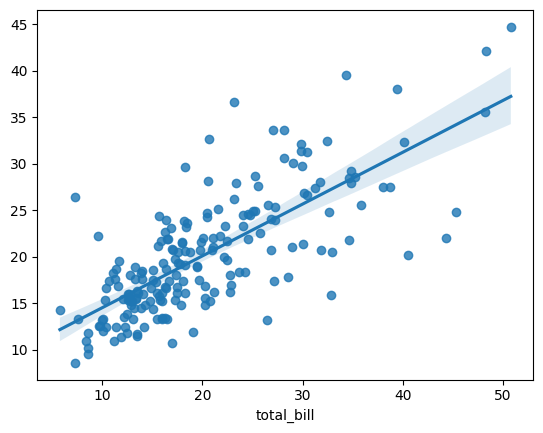

In [38]:
sns.regplot(x = y_train, y = y_train_pred)

In [39]:
np.corrcoef(y_train, y_train_pred)

array([[1.        , 0.74633882],
       [0.74633882, 1.        ]])

<AxesSubplot: xlabel='total_bill'>

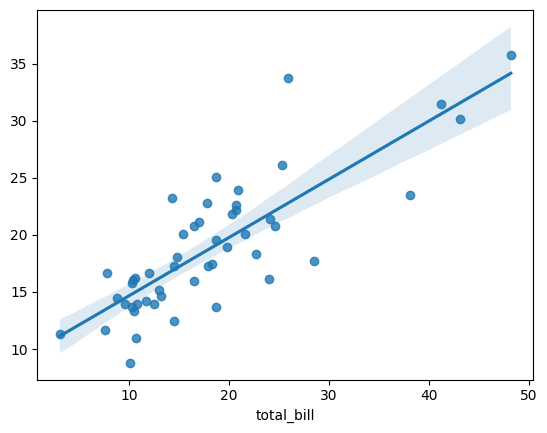

In [40]:
sns.regplot(x = y_test, y = y_test_pred)


In [41]:
np.corrcoef(y_test, y_test_pred)


array([[1.        , 0.81671879],
       [0.81671879, 1.        ]])